In [7]:
import numpy as np
import gsd
import gsd.hoomd
import os
workdir = "/scratch/projects/hockygroup/sp6310/ionic_crystal/ionic_crystal/ExperimentalData/New_simulation2/corrected_pot2/charged_wall/\
fromOldruns"
#gsdfile = os.path.join(workdir, "zanganite_crystal_seed_lasttraj.gsd")
gsdfile = os.path.join(workdir, "zunganite_cut_bigger_ver3.gsd")
traj = gsd.hoomd.open(gsdfile, mode = "rb")


In [8]:
snap = traj[0]
npart = snap.particles.N
print(npart)
positions = snap.particles.position
typeid = snap.particles.typeid
indP = np.where(typeid==0)[0]
indN = np.where(typeid==1)[0]
posP = positions[indP]
posN = positions[indN]
numP = len(posP)
numN = len(posN)
print(len(posP))

1486
956


In [9]:
rall = []
for i in range(len(positions)):
    pos = positions[i]
    posbrd = np.broadcast_to(pos, (npart-1,3))
    positions_ = np.delete(positions, i, axis=0)
    dr = positions_ - posbrd
    r = np.sqrt(np.sum(dr**2, axis=1))
    r_nbr = r[r<1000]
    rall.extend(r_nbr)

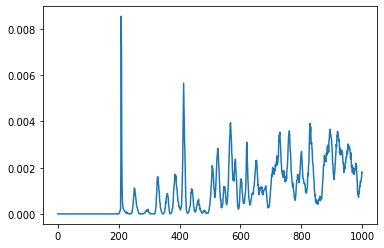

In [11]:
import matplotlib.pyplot as plt
hist, bin_edges = np.histogram(rall, range=(0,1000), bins=1000,density=True)
bins = (bin_edges[1:]+bin_edges[:-1])/2
plt.plot(bins,hist)
#plt.ylim(0,800)
#plt.xlim(0,400)

In [15]:
print(np.concatenate((bins.reshape(-1,1), hist.reshape(-1,1)),axis=1)[0:300])

[[5.000e-01 0.000e+00]
 [1.500e+00 0.000e+00]
 [2.500e+00 0.000e+00]
 [3.500e+00 0.000e+00]
 [4.500e+00 0.000e+00]
 [5.500e+00 0.000e+00]
 [6.500e+00 0.000e+00]
 [7.500e+00 0.000e+00]
 [8.500e+00 0.000e+00]
 [9.500e+00 0.000e+00]
 [1.050e+01 0.000e+00]
 [1.150e+01 0.000e+00]
 [1.250e+01 0.000e+00]
 [1.350e+01 0.000e+00]
 [1.450e+01 0.000e+00]
 [1.550e+01 0.000e+00]
 [1.650e+01 0.000e+00]
 [1.750e+01 0.000e+00]
 [1.850e+01 0.000e+00]
 [1.950e+01 0.000e+00]
 [2.050e+01 0.000e+00]
 [2.150e+01 0.000e+00]
 [2.250e+01 0.000e+00]
 [2.350e+01 0.000e+00]
 [2.450e+01 0.000e+00]
 [2.550e+01 0.000e+00]
 [2.650e+01 0.000e+00]
 [2.750e+01 0.000e+00]
 [2.850e+01 0.000e+00]
 [2.950e+01 0.000e+00]
 [3.050e+01 0.000e+00]
 [3.150e+01 0.000e+00]
 [3.250e+01 0.000e+00]
 [3.350e+01 0.000e+00]
 [3.450e+01 0.000e+00]
 [3.550e+01 0.000e+00]
 [3.650e+01 0.000e+00]
 [3.750e+01 0.000e+00]
 [3.850e+01 0.000e+00]
 [3.950e+01 0.000e+00]
 [4.050e+01 0.000e+00]
 [4.150e+01 0.000e+00]
 [4.250e+01 0.000e+00]
 [4.350e+01

<ipython-input-13-f3eda5f39f0c>:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(os.path.join(workdir,"disdist_zanganite.eps"),bbox_inches='tight',format='eps',dpt=2000)


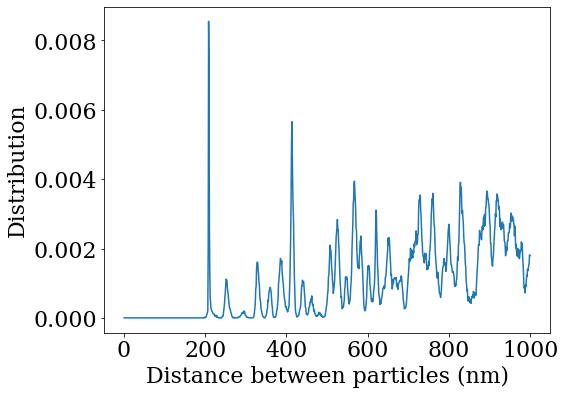

In [13]:
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'serif',
        'size'   : 22}
matplotlib.rc('font', **font)
fig = plt.figure(figsize =(8,6))
hist, bin_edges = np.histogram(rall, range=(0,1000), bins=1000, density = True)
bins = (bin_edges[1:]+bin_edges[:-1])/2
plt.plot(bins,hist)
#plt.ylim(0,800)
plt.xlabel("Distance between particles (nm)")
plt.ylabel("Distribution")
plt.savefig(os.path.join(workdir,"disdist_zanganite.png"),bbox_inches='tight')
plt.savefig(os.path.join(workdir,"disdist_zanganite.eps"),bbox_inches='tight',format='eps',dpt=2000)
data = np.concatenate((bins.reshape(-1,1),hist.reshape(-1,1)),axis=1)
np.savetxt(os.path.join(workdir,"disdist_zanganite.txt"),data, fmt='%10.5f')